# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from __future__ import division
import scipy.stats as stats


import statsmodels.api as sm
sns.set()

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
df = data[['race','call']]

In [6]:
df.isnull().any()

race    False
call    False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 2 columns):
race    4870 non-null object
call    4870 non-null float32
dtypes: float32(1), object(1)
memory usage: 95.1+ KB


## Is Race a Factor in Getting Call-backs


Initially, a Chi-Square Test is used in order to test race has an influence on the rate of receiving call-backs. To test whether or not there is an association between the grouping variables and its respected categorical response variable, a Chi-Square Distribution can be used to approximate the sampling distribution if and only if the following conditions are met:


1. Random Sample
2. Independent Measurements
3. A Large Sample Size (Expected Count in each cell is >=5)
 

$\chi^2$ = $\frac{1}{d}\sum_{k=1}^{n} \frac{(O_k - E_k)^2}{E_k}$


The Chi-Statistic will measure how different our expected counts are from the observed counts. The larger the Chi-Statistic, the more reason there is to reject the null hypothesis and the observed counts should be very different than the expected counts. In the Chi-Square Distribution, only positive values are allowed and therefore is heavily skewed right with only degrees of freedom as its parameters. 

<br>

$H_{o}$ : There is no association between race and the call-back rate 

$H_{A}$ : There is an association between race and the call-back rate

<br>


$\chi^2$ = 16.449028584189371

p-value = 4.9975783899632552e-05

<br>
A Chi-Square Statistic of 16.449 is considered relatively high and this makes the null hypothesis suspect to reject. In order to validate further if reality is different than what is observed, a p-value is computed. And since the p-value is less than 0.05, there is evidence to believe that there is an association between race and the call-back rate. Because the Chi-Square Test only test whether or not there is an association and not how much the call-back rate between races differ, a Two Proportion Z-test is then used. 


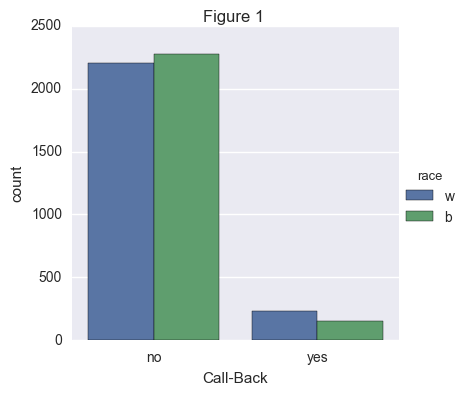

In [8]:
g = sns.factorplot(x='call',hue='race', data=df, kind='count')
g.set_xticklabels(['no','yes'])
plt.xlabel('Call-Back')
fig = g.fig
fig.suptitle('Figure 1')


In [9]:
contingency_table = pd.crosstab(index=df.call, columns=df.race, margins=True)
contingency_table.columns = ['Black', 'White', 'Total']
contingency_table.index=['No','Yes', 'Total']
contingency_table

,Black,White,Total
No,2278,2200,4478
Yes,157,235,392
Total,2435,2435,4870


In [10]:
contg_table = pd.crosstab(index=df.call, columns=df.race)
contg_table

race,b,w
call,,
0.0,2278,2200
1.0,157,235


In [11]:
chi2, p, dof, ex =stats.chi2_contingency(contg_table)
chi2, p, dof

(16.449028584189371, 4.9975783899632552e-05, 1)

In [15]:
stats.chi2.ppf(q=0.95, df=dof)

3.8414588206941236

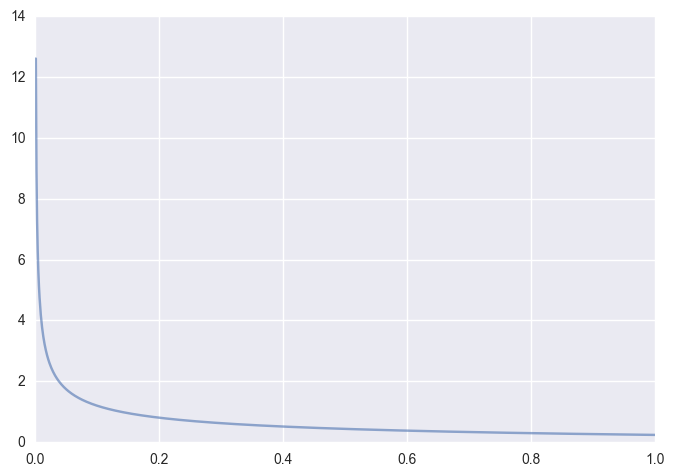

In [16]:
from scipy.stats import chi2

x = np.linspace(0,1,1000)
plt.plot(x, stats.chi2.pdf(x, dof), alpha=0.6)

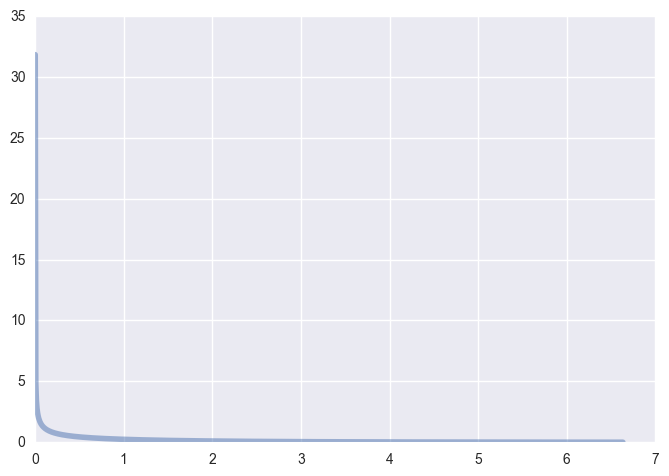

In [17]:
y = np.linspace(chi2.ppf(0.01, dof), chi2.ppf(0.99, dof), 1000)
plt.plot(y, chi2.pdf(y, dof), alpha=0.5, lw=4)

## Two Proportion Z-Test:


When both categorical variables have two categories, a Two-Proportion Z-Test can be used because it is identical to the test of homogeneity. Although the Chi-Square Test can determine if there is an association or not, it does not quantify the difference between the two categorical variables. 

$\hat{p}_{1}$ = The proportion of Black-sounding names that receive a call-back

$\hat{p}_{2}$ = The proportion of White-sounding names that receive a call-back


$H_{o}$ : $\hat{p}_{1} = \hat{p}_{2}$ or $\hat{p}_{1} - \hat{p}_{2}$ = 0

$H_{A}$ : $\hat{p}_{1} < \hat{p}_{2}$


Under the null hypothesis, the proportion of black-sounding names that receive a call-back is the sme as the white-sounding names. To determine whether there is a significant difference between white and black sounding names, the alternative hypothesis will test if the proportion of black-sounding names receive less call-backs than white-sounding names since in Figure 1 it appears that the proportion of white-sounding names are higher than the black-sounding names.


The data shows that of the 2435 resumes sent out with black-sounding names, 6.44% of the black-sounding names receive a call-back. Of the 2435 resumes with white-sounding names, 9.65% of the white-sounding names received a call back. The difference between the black and white sounding names receiving call-backs is -3.203, where $\hat{p}_{1} - \hat{p}_{2}$, with a difference as low as -4.73% and as high as -1.68%. With the negative values included in the confidence interval for the difference in proportions between black and white sounding names, it indicates that the proportion of white-sounding names receiving call-backs is higher than black-sounding names. 


With a z-score of -4.108, a p-value of 1.9919434187925383e-05 is computed. Since the p-value is less than 0.05, there is reason to reject the null hypothesis that the proportion of white and black sounding names receiving call-backs is the same and there is evidence that the proportion of black-sounding names receive 3.203% fewer call-backs than white-sounding names.

In [18]:
n1 = len(df[df.race=='b'])
x1 = len(df[(df.race=='b') & (df.call==1.0)])
p1 = x1 / n1
p1 * 100

6.447638603696099

In [19]:
n2 = len(df[df.race=='w'])
x2 = len(df[(df.race=='w') & (df.call==1.0)])
p2 = x2 / n2
p2*100

9.650924024640657

In [20]:
p_hat = (x1 + x2) /(n1+n2)
SEM = np.sqrt(p_hat*(1-p_hat) *((1/n1)+(1/n2)))

In [21]:
z = (p1-p2)/SEM
z

-4.1084121524343464

In [31]:
p_value  = stats.norm.sf(abs(z))
p_value

1.9919434187925383e-05

In [32]:
diff_prop = p1 - p2 
diff_prop * 100

-3.2032854209445585

In [25]:
m = 1.96 * SEM 

In [36]:
CI = (diff_prop - m) * 100, (diff_prop + m) * 100
CI 

(-4.7314766520339679, -1.6750941898551488)

## Conclusion

While the Chi-Square Test does show there is an association between receiving a call-back and race, the Two-Proportion Z-Test shows that of the resumes, the black-sounding names receive 3.203% fewer call-backs than white-sounding names. However, because there is an association between race and receiving call-backs is shown from the data, the race implications of a person's name cannot alone determine call-back success. Other factors such as education level or years of experience should be included to determine if there is a race effect on call-back success.